In [1]:
#? The problem
# Recommendations:: the internet gives us ocean of choices in terms of products,movies,music,videos,you name it.
#fortunately leading company like amazon,netflix,youtube understand this problem and offer high quality


In [2]:
# HOW DOES IT WORK?
#user behaviour is great source of data
#Each of us has a certain browsing and purchasing behaviours.Those behaviours are captured in many ways, 
#such as user ratings,search history,or products we have purchased.
#Given enough data ,it is possible to identify individuals with intersert similar to yours.Their
#prchasing behaviours are an indicator of products you might also be interested in.
# Ofcourse new products are comming so high quality recoomendation are important.

# Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Add, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [4]:
#ADD PATH OF MOVIES DATASET
movies=pd.read_csv('C:\\Users\\Admin\\github\\DAtA SET\\ml-latest-small\\movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movies.shape

(9742, 3)

In [6]:
#ADD PATH OF RATING THE MOVIE DATASET
ratings=pd.read_csv('C:\\Users\\Admin\\github\\DAtA SET\\ml-latest-small\\ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# join ratings with movies
# The ratings don't contain movie titles, so let's join or merge these two sets for convenience.

In [7]:
ratings=ratings.merge(movies,on='movieId')

In [8]:
ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
ratings=ratings.drop(["genres","timestamp"],axis=1)
ratings.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


# Generate Sequential Identifiers::
userId and movieId are not sequential, which causes problems for our model. To compensate, we can use the LabelEncoder class from scikit-learn to generate sequential identifiers for users and movies. The original identifiers are still available, so we can always join back to the original data set if needed.

In [10]:
user_enc = LabelEncoder()
ratings['UserSeq']=user_enc.fit_transform(ratings['userId'].values)

In [11]:
item_enc = LabelEncoder()
ratings['movieSeq']=item_enc.fit_transform(ratings['movieId'].values)

In [12]:
ratings.head()

,userId,movieId,rating,title,UserSeq,movieSeq
0,1,1,4.0,Toy Story (1995),0,0
1,5,1,4.0,Toy Story (1995),4,0
2,7,1,4.5,Toy Story (1995),6,0
3,15,1,2.5,Toy Story (1995),14,0
4,17,1,4.5,Toy Story (1995),16,0


# Train/Test Split::
This case is a bit unusual because we need ratings for every movie from every user to train an accurate model. If we used a traditional split, some movies might be left out, which will cause problems during predictio
For this reason, we will use all of the data for training and a subset for model validation only.

In [13]:
train_unused, test = train_test_split(ratings, test_size=0.20, random_state=0)

In [15]:
#ALL DATA IS USED FOER TRAINING

train=ratings

numUsers = len(train.UserSeq.unique())
numMovies=len(train.movieSeq.unique())
print((numUsers,numMovies))
print((len(train),len(test)))


(610, 9724)
(100836, 20168)


# Recommendation Model ::
Collaborative filtering tries to minimize the error between a predicted value and ground truth.
This is similar to many supervised machine learning problems. 
The model learns a set of features that similar movies share.
The number of features could be as simple as the genre or more complex. 
# numFeatures variable below is a hyperparameter that can be tuned to optimize performance.

In [16]:
numFeatures=50
dropout=0.0


In [17]:
user_input = Input(shape=(1,))
user_emb = Embedding(numUsers, numFeatures)(user_input)
flat_user = Flatten()(user_emb)
user_dropout = Dropout(dropout)(flat_user)

In [18]:
movies_input=Input(shape=(1,))
user_emb=Embedding(numMovies,numFeatures)(movies_input)
flat_movies= Flatten() (user_emb)
movies_dropout= Dropout(dropout)(flat_movies)

In [20]:
DotProduct= Dot(axes=1)([user_dropout,movies_dropout])

In [22]:
user_bias=Embedding(numUsers,1)(user_input)
movie_bias=Embedding(numMovies,1)(movies_input)
sum=Add()([DotProduct, user_bias, movie_bias])
flat_sum= Flatten()(sum)
output=Dropout(dropout)(flat_sum)

In [24]:
model = Model([user_input, movies_input], output)

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        30500       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        486200      input_2[0][0]                    
______________________________________________________________________________________________

# Model training

In [90]:
#model.compile(loss='mean_squared_error',optimizer =Adam())
#history=model.fit([train.UserSeq,train.movieSeq],train.ratings,
#                 batch=32,epochs=10, verbose=1,#
#                 validation_data=([test.UserSeq,test.movieSeq],test.ratings))


In [26]:
model.compile(loss='mean_squared_error', optimizer=Adam())
history = model.fit([train.UserSeq, train.movieSeq], train.rating,
                   batch_size=32, epochs=10, verbose=1,
                    validation_data=([test.UserSeq, test.movieSeq], test.rating))

Train on 100836 samples, validate on 20168 samples
Epoch 1/10
100836/100836 [==============================] - 63s 623us/sample - loss: 6.1518 - val_loss: 1.4445
Epoch 2/10
100836/100836 [==============================] - 54s 538us/sample - loss: 1.1512 - val_loss: 0.8167
Epoch 3/10
100836/100836 [==============================] - 53s 530us/sample - loss: 0.8239 - val_loss: 0.6546
Epoch 4/10
100836/100836 [==============================] - 53s 530us/sample - loss: 0.6867 - val_loss: 0.5550
Epoch 5/10
100836/100836 [==============================] - 56s 553us/sample - loss: 0.5829 - val_loss: 0.4669
Epoch 6/10
100836/100836 [==============================] - 53s 523us/sample - loss: 0.4917 - val_loss: 0.3886
Epoch 7/10
100836/100836 [==============================] - 54s 532us/sample - loss: 0.4093 - val_loss: 0.3159
Epoch 8/10
100836/100836 [==============================] - 57s 565us/sample - loss: 0.3375 - val_loss: 0.2549
Epoch 9/10
100836/100836 [==============================] - 4

In [85]:
#SGD OPTIMIZER
#model.compile(loss='mean_squared_error', optimizer='sgd')
#history = model.fit([train.UserSeq, train.movieSeq], train.rating,
#                   batch_size=32, epochs=10, verbose=1,
#                    validation_data=([test.UserSeq, test.movieSeq], test.rating))

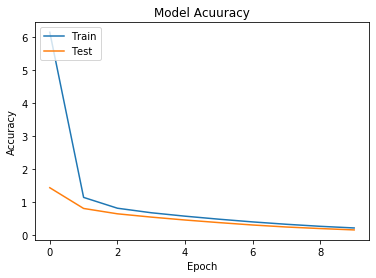

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Acuuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [29]:
#Notice the validation loss is slightly lower than the training loss. If the model was overfitting, then the opposite would be true, so this is a peculiar case.

#There are a few reasons this can happen:

 #   Keras artifact explained the Keras FAQ. Keras computes training loss as the average during training time, which can change quite a bit during one epoch. Validation is computed at the end of an epoch when the model loss is probably lower.
 #   The test set is not not representative of the training set. In some cases, the test set might be easier to predict than the training set. This could happen if a very small test set is used.



# Make Predictions
We can make predictions for a given user by creating a numpy array of all movies and a numpy array of the same dimension filled with just the one user we are interested in. The model will predict ratings for the specified user given all movies in the full data set.

We can then sort the data set by predicted rating descending to get the best recommendations first.

In [30]:
# The user for whom we want to make recommendations
userNumber=0
uniqueMovies=ratings.drop_duplicates(subset=['movieSeq'])
movie_vector=uniqueMovies.movieSeq.values
user_vector=np.ones((len(uniqueMovies),))*userNumber
predictions=model.predict([user_vector,movie_vector])
pSeries=pd.Series([a[0] for a in predictions])
predictedDF=uniqueMovies.copy()
predictedDF['Predictions'] = pSeries

In [31]:
predictedDF.sort_values(by='Predictions', ascending=False).head(10)

,userId,movieId,rating,title,UserSeq,movieSeq,Predictions
4121,1,592,4.0,Batman (1989),0,509,6.149776
5770,1,1025,5.0,"Sword in the Stone, The (1963)",0,783,5.685881
6347,1,1090,4.0,Platoon (1986),0,828,5.545572
4992,1,661,5.0,James and the Giant Peach (1996),0,551,5.513171
1135,1,157,5.0,Canadian Bacon (1995),0,130,5.505654
2316,1,349,4.0,Clear and Present Danger (1994),0,307,5.470481
6127,1,1080,5.0,Monty Python's Life of Brian (1979),0,819,5.347478
2755,1,362,5.0,"Jungle Book, The (1994)",0,320,5.190803
6457,1,1097,5.0,E.T. the Extra-Terrestrial (1982),0,835,5.174280
5548,1,919,5.0,"Wizard of Oz, The (1939)",0,701,5.129038


## Error nalysis::


In [48]:
oneUser=predictedDF[predictedDF.UserSeq==userNumber].copy
oneUser['Error']=(oneUser.ratings . oneUser.Prediction)**2
oneUser.sort_values(by='Error',ascending=False).head(5)

AttributeError: 'function' object has no attribute 'ratings'